In [265]:
import pandas as pd
import numpy as np
import datetime
from glob import glob
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.dates as mdates
plt.rcParams['image.cmap'] = 'coolwarm'
%matplotlib inline

## Import the data

In [266]:
meeting_names = list(map(lambda x: x.replace('_meeting.pkl', ''), glob('*meeting.pkl')))

df_meetings = pd.concat([pd.read_pickle(name + "_meeting.pkl") for name in meeting_names])
df_contributions = pd.concat([pd.read_pickle(name + "_contributions.pkl") for name in meeting_names])    
df = df_contributions.join(df_meetings, on='id_meeting', lsuffix='_contribution')
df_meetings['minutes'] = df.groupby('id_meeting')['duration'].sum()

null_meetings_mask = ((df_meetings['title'].str.contains('CANCELLED')) | \
                      (df_meetings['title'].str.contains('CANCELED')) | \
                      (df_meetings['contributions'] == 0))
df_meetings_not_null = df_meetings[~null_meetings_mask]

df_meeting_grouped_by_mytitle = df_meetings.groupby('my_title')
df_meeting_grouped_by_mytitle_not_null = df_meetings_not_null.groupby('my_title')

In [267]:
df_meetings.groupby('my_title').size().sort_values(ascending=False)

my_title
HGam_xsection    138
HGam_coupling    123
HGam_yysearch    115
HGam_plenary     109
HGam_Zgamma      105
HGam_yyMET        35
dtype: int64

### Empty meeting (not deleted)

In [268]:
df_meetings[null_meetings_mask].groupby('my_title').size().sort_values(ascending=False)

my_title
HGam_coupling    24
HGam_yysearch    21
HGam_Zgamma       8
HGam_xsection     6
HGam_plenary      2
dtype: int64

## Full period

In [269]:
print("Time range: {}, {}".format(df['date_meeting'].min(), df['date_meeting'].max()))

Time range: 2017-01-05 00:00:00, 2019-10-15 00:00:00


In [270]:
print("number of weeks: %f" % (str(df['date_meeting'].max() - df['date_meeting'].min()) / pd.Timedelta(days=7)))

number of weeks: 144.714286


## Number of meetings (removing null meetings)

In [271]:
df_meetings_not_null.groupby('my_title').size().sort_values(ascending=False)

my_title
HGam_xsection    132
HGam_plenary     107
HGam_coupling     99
HGam_Zgamma       97
HGam_yysearch     94
HGam_yyMET        35
dtype: int64

## Total number of contributions

In [272]:
total_count = df_meetings_not_null.groupby(('my_title'))['contributions'].sum().sort_values(ascending=False)
pd.DataFrame(total_count)

,contributions
my_title,
HGam_plenary,374
HGam_xsection,367
HGam_coupling,305
HGam_Zgamma,282
HGam_yysearch,260
HGam_yyMET,125


## Number of contributions per months
Number of contributions, as in the indico meeting page, grouped by months

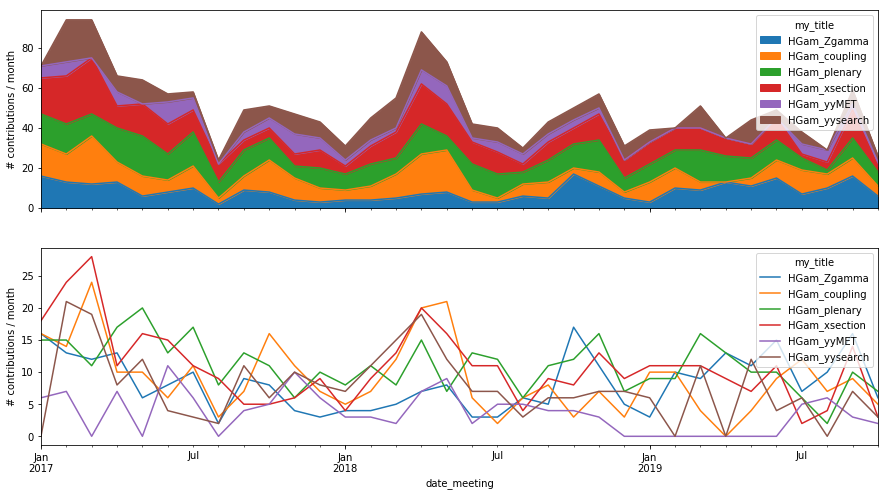

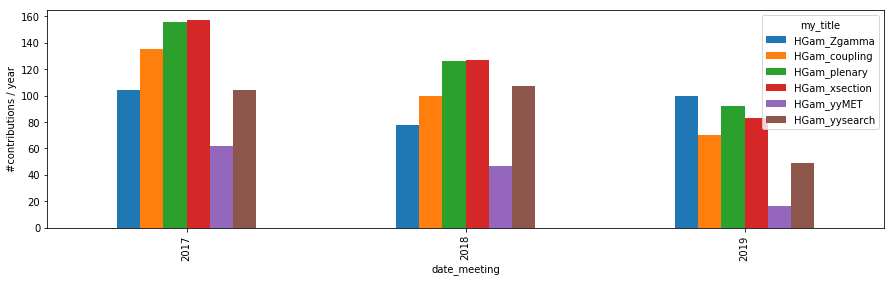

In [273]:
f, axs = plt.subplots(2, 1, figsize=(15, 8), sharex=True)
df_meetings_not_null.groupby([pd.Grouper(freq='MS',key='date_meeting'), 'my_title'])['contributions'].sum().unstack().fillna(0).plot(kind='area', ax=axs[0])
df_meetings_not_null.groupby([pd.Grouper(freq='MS',key='date_meeting'), 'my_title'])['contributions'].sum().unstack().fillna(0).plot(ax=axs[1])

for ax in axs: ax.set_ylabel('# contributions / month')
f, ax = plt.subplots(figsize=(15, 4))
df_meetings_not_null.groupby([df_meetings_not_null['date_meeting'].dt.year, 'my_title'])['contributions'].sum().unstack().fillna(0).plot(kind='bar', ax=ax)

ax.set_ylabel('#contributions / year')
plt.show()

## Number of minutes
Sum of the duration of each contribution, grouped per months

In [274]:
total_minutes = df.groupby(('my_title'))['duration'].sum()
pd.DataFrame(total_minutes).sort_values('duration', ascending=False)

,duration
my_title,
HGam_plenary,7220
HGam_xsection,7115
HGam_Zgamma,5490
HGam_coupling,4734
HGam_yysearch,4355
HGam_yyMET,2241


In [304]:
show = df.groupby(['my_title', df['date_meeting'].dt.year])['duration'].sum().unstack()
for column in show.columns[1:]:
    show['trend_%s' % column] = show[column] / show[show.columns[0]] - 1
show

date_meeting,2017,2018,2019,trend_2018,trend_2019
my_title,,,,,
HGam_Zgamma,2065,1525,1900,-0.261501,-0.079903
HGam_coupling,1749,1830,1155,0.046312,-0.339623
HGam_plenary,3090,2480,1650,-0.197411,-0.466019
HGam_xsection,3065,2440,1610,-0.203915,-0.474715
HGam_yyMET,1061,860,320,-0.189444,-0.698398
HGam_yysearch,1446,1987,922,0.374136,-0.362379


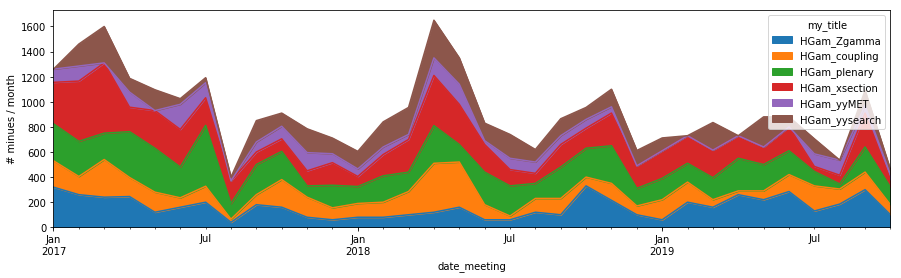

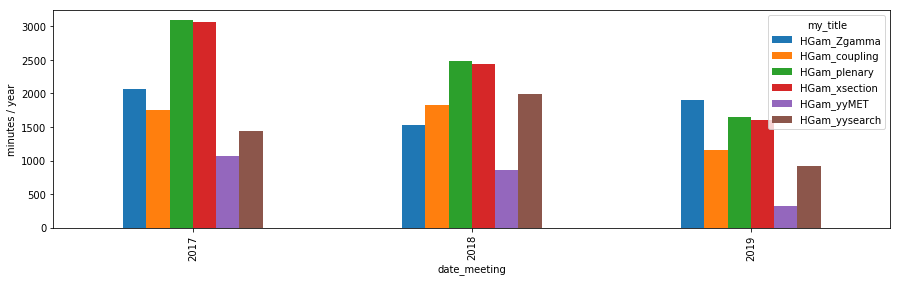

In [302]:
f, ax = plt.subplots(1, 1, figsize=(15, 4), sharex=True)
gr = df.groupby([pd.Grouper(freq='MS',key='date_meeting'), 'my_title'])['duration'].sum().unstack().fillna(0)
gr.plot(kind='area', ax=ax)
ax.set_ylabel('# minues / month')
    
f, ax = plt.subplots(figsize=(15, 4))
df.groupby([df_meetings['date_meeting'].dt.year, 'my_title'])['duration'].sum().unstack().fillna(0).plot(kind='bar', ax=ax)

ax.set_ylabel('minutes / year')
plt.show()    

## Number of contributions per meeting
Including introductions. Do not count meetings with 0 contributions.

mean                           std                    
date_meeting       2017      2018      2019      2017      2018      2019
my_title                                                                 
HGam_Zgamma    2.971429  2.516129  3.225806  1.224402  1.480337  1.453953
HGam_coupling  3.552632  3.333333  2.258065  1.750635  1.422318  0.929794
HGam_plenary   3.627907  3.405405  3.407407  1.091597  1.300843  2.308167
HGam_xsection  3.204082  2.490196  2.593750  2.140673  1.713156  1.387952
HGam_yyMET     4.133333  3.357143  2.666667  1.505545  1.008208  1.505545
HGam_yysearch  3.151515  2.377778  3.062500  2.237761  1.418849  1.289380

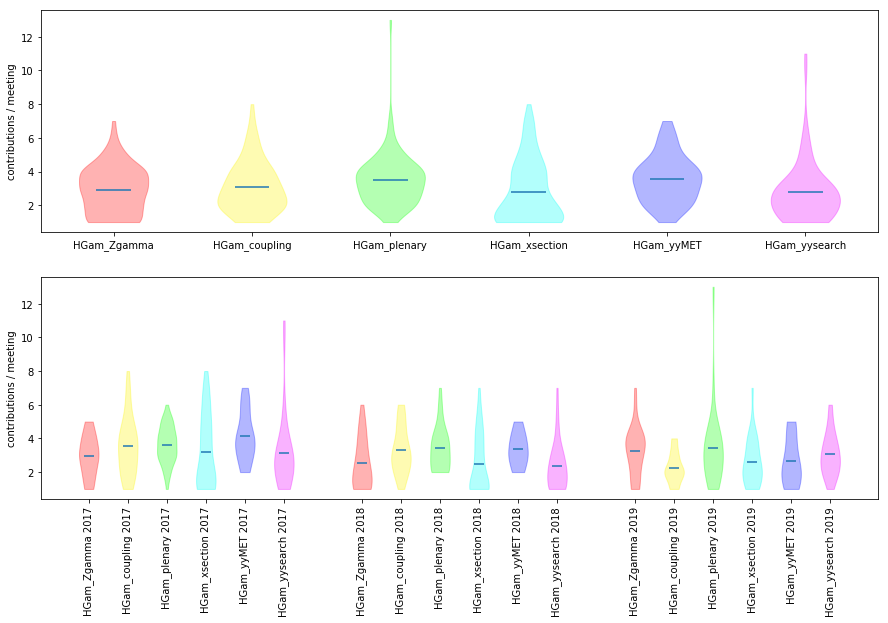

In [277]:
f, axs = plt.subplots(2, 1, figsize=(15, 9), sharey=True)

violins = axs[0].violinplot([v.values for k, v in df_meeting_grouped_by_mytitle_not_null['contributions']], showextrema=False, showmeans=True)
keys = [k for k, v in df_meeting_grouped_by_mytitle['contributions']]
for k, body in zip(keys, violins['bodies']):
    body.set_color(cm.hsv(keys.index(k) / float(len(keys))))
axs[0].set_xticks(np.arange(1, len(keys) + 1))
axs[0].set_xticklabels(keys)
axs[0].set_ylabel('contributions / meeting')

gr = df_meetings_not_null.groupby(['my_title', df_meetings_not_null['date_meeting'].dt.year])['contributions']
keys = [k for k, v in gr]
title_keys = list(np.unique([k[0] for k in keys]))
years_keys = list(np.unique([k[1] for k in keys]))
pos = [years_keys.index(k[1]) * (len(title_keys) + 1) + title_keys.index(k[0]) for k in keys]
violins = axs[1].violinplot([v.values for k, v in gr], showextrema=False, showmeans=True, positions=pos)
for k, body in zip(keys, violins['bodies']):
    body.set_color(cm.hsv(title_keys.index(k[0]) / float(len(title_keys))))
axs[1].set_xticks(pos)
axs[1].set_xticklabels([' '.join(map(str, k)) for k in keys], rotation='vertical')
axs[1].set_ylabel('contributions / meeting')
gr.aggregate(['mean', 'std']).unstack()


## Meeting duration
Including introductions. Do not count meetings with 0 contributions.

mean                              std             \
date_meeting        2017       2018       2019       2017       2018   
my_title                                                               
HGam_Zgamma    59.000000  49.193548  61.290323  23.880832  28.198604   
HGam_coupling  45.894737  57.000000  35.322581  25.673406  31.282914   
HGam_plenary   71.860465  67.027027  61.111111  44.468063  25.859112   
HGam_xsection  62.551020  47.843137  50.312500  40.902863  31.452423   
HGam_yyMET     70.733333  61.428571  53.333333  23.517369  18.337495   
HGam_yysearch  43.212121  41.933333  57.625000  21.180412  25.633253   

                          
date_meeting        2019  
my_title                  
HGam_Zgamma    27.747905  
HGam_coupling  18.660809  
HGam_plenary   29.033579  
HGam_xsection  27.177360  
HGam_yyMET     30.110906  
HGam_yysearch  27.023138

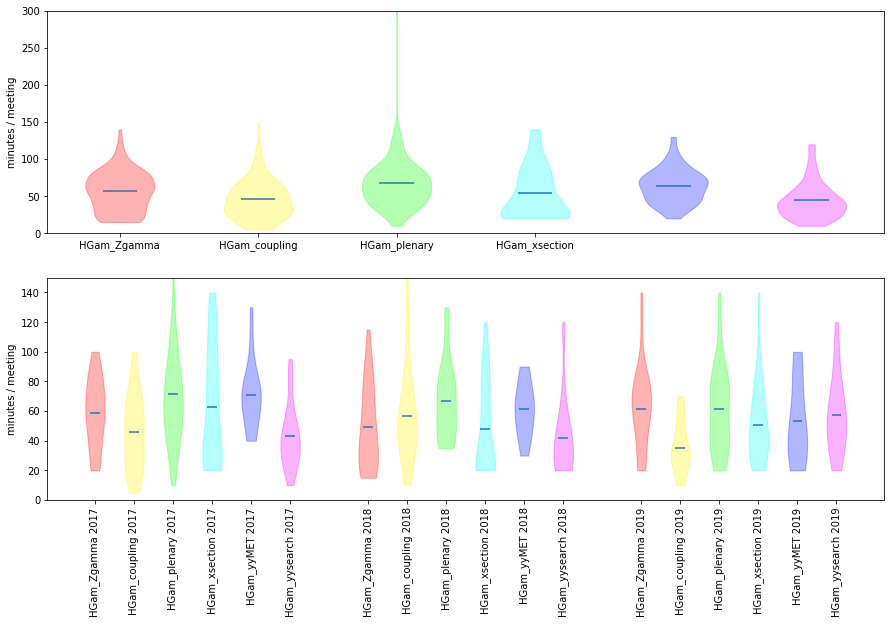

In [278]:
f, axs = plt.subplots(2, 1, figsize=(15, 9), sharey=False)

gr = df_meetings_not_null.groupby(['my_title'])["minutes"]
violins = axs[0].violinplot([v.values for k, v in gr], showextrema=False, showmeans=True)
keys = [k for k, v in df_meeting_grouped_by_mytitle['contributions']]
for k, body in zip(keys, violins['bodies']):
    body.set_color(cm.hsv(keys.index(k) / float(len(keys))))
axs[0].set_xticks([1, 2, 3, 4])
axs[0].set_xticklabels(keys)
axs[0].set_ylabel('minutes / meeting')
axs[0].set_ylim(0, 300)


gr = df_meetings_not_null.groupby(['my_title', df_meetings_not_null['date_meeting'].dt.year])["minutes"]
keys = [k for k, v in gr]
title_keys = list(np.unique([k[0] for k in keys]))
years_keys = list(np.unique([k[1] for k in keys]))
pos = [years_keys.index(k[1]) * (len(title_keys) + 1) + title_keys.index(k[0]) for k in keys]
violins = axs[1].violinplot([v.values for k, v in gr], showextrema=False, showmeans=True, positions=pos)
for k, body in zip(keys, violins['bodies']):
    body.set_color(cm.hsv(title_keys.index(k[0]) / float(len(title_keys))))
axs[1].set_xticks(pos)
axs[1].set_xticklabels([' '.join(map(str, k)) for k in keys], rotation='vertical')
axs[1].set_ylabel('minutes / meeting')
axs[1].set_ylim(0, 150)
gr.aggregate(['mean', 'std']).unstack()

## Total number of people who made a talk
Only 1 person is counted for each talk (the first). Introduction (matching "Introduction" case insensitive) talk are not considered.

In [279]:
mask_introduction = df.apply(lambda x: 'introduction' in x['title_contribution'].lower(), axis=1)
no_intro = df[np.logical_not(mask_introduction)]
pd.DataFrame(no_intro.groupby([no_intro['date_meeting'].dt.year])['speaker'].nunique())

,speaker
date_meeting,
2017,98
2018,83
2019,71


date_meeting,2017,2018,2019,trend_2018,trend_2019
my_title,,,,,
HGam_Zgamma,9,12,10,0.333333,0.111111
HGam_coupling,24,19,18,-0.208333,-0.250000
HGam_plenary,55,42,37,-0.236364,-0.327273
HGam_xsection,27,18,16,-0.333333,-0.407407
HGam_yyMET,12,11,8,-0.083333,-0.333333
HGam_yysearch,26,15,11,-0.423077,-0.576923


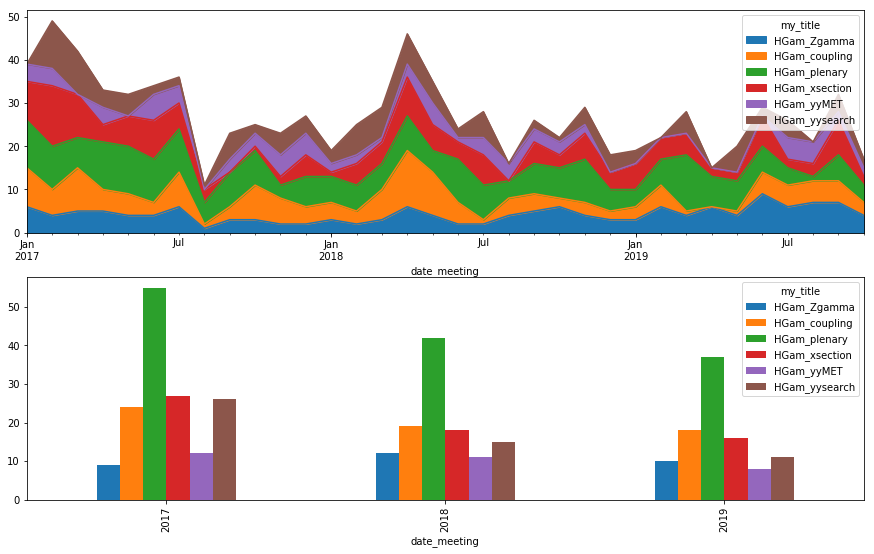

In [305]:
fig, axs = plt.subplots(2, 1, figsize=(15, 9))
no_intro.groupby([no_intro['date_meeting'].dt.year, 'my_title'])['speaker'].nunique().unstack().plot(kind='bar', ax=axs[1])
no_intro.groupby([pd.Grouper(freq='1MS',key='date_meeting'), 'my_title'])['speaker'].unique().apply(lambda x: len(x)).unstack().plot(ax=axs[0], kind='area')
#no_intro.groupby([pd.Grouper(freq='1MS',key='date_meeting'), 'my_title'])['speaker'].unique().apply(lambda x: len(x)).unstack().fillna(0).plot(ax=axs[1])

show = no_intro.groupby(['my_title', no_intro['date_meeting'].dt.year])['speaker'].nunique().unstack()
for column in show.columns[1:]:
    show['trend_%s' % column] = show[column] / show[show.columns[0]] - 1
show

## Minutes of talks per person
Only 1 person is counted for each talk (the first). Introduction (matching "Introduction" case insensitive) talk are not considered.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3085524110>,
      dtype=object)

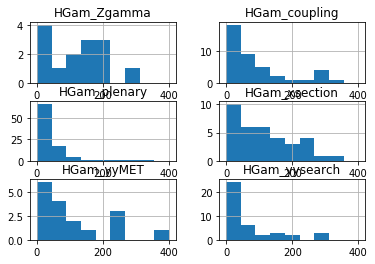

In [281]:
duration_per_person = pd.DataFrame(no_intro.groupby(['speaker', 'my_title'])['duration', 'my_title'].sum()).unstack()['duration']
duration_per_person.hist(bins=np.linspace(0, 400, 10))

Text(0.5, 0, '#minutes / unique person')

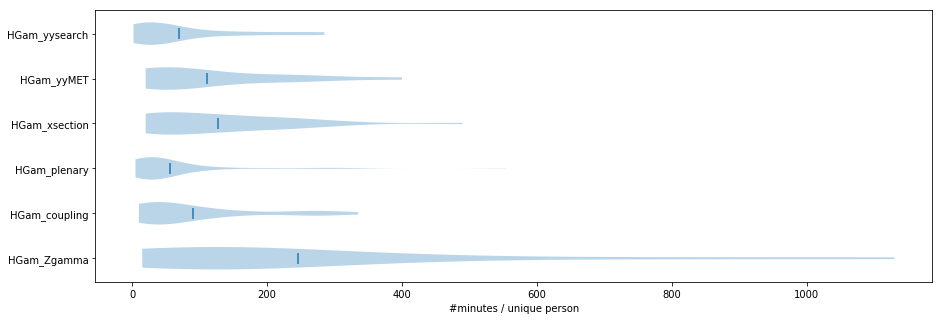

In [282]:
fig, ax = plt.subplots(figsize=(15, 5))
d = {}
for k, v in no_intro.groupby(['my_title', 'speaker'])['duration'].sum().reset_index().groupby('my_title')['duration']:
    d[k] = v.values
ax.violinplot(d.values(), showmeans=True, showextrema=False, vert=False)
ax.set_yticks(range(1, len(d) + 1))
ax.set_yticklabels(d.keys())
ax.set_xlabel('#minutes / unique person')

In [324]:
show = no_intro.groupby(['my_title', no_intro['date_meeting'].dt.year])['duration'].sum().unstack() / \
no_intro.groupby(['my_title', no_intro['date_meeting'].dt.year])['speaker'].nunique().unstack()

for column in show.columns[1:]:
    show['trend_%s' % column] = show[column] / show[show.columns[0]] - 1
show

date_meeting,2017,2018,2019,trend_2018,trend_2019
my_title,,,,,
HGam_Zgamma,171.666667,105.416667,161.500000,-0.385922,-0.059223
HGam_coupling,60.375000,76.842105,44.166667,0.272747,-0.268461
HGam_plenary,46.272727,42.857143,31.486486,-0.073814,-0.319545
HGam_xsection,77.777778,78.888889,66.250000,0.014286,-0.148214
HGam_yyMET,71.333333,65.454545,40.000000,-0.082413,-0.439252
HGam_yysearch,38.115385,77.666667,57.272727,1.037672,0.502614


## Most common words
From the title of the contributions, excluding commong words

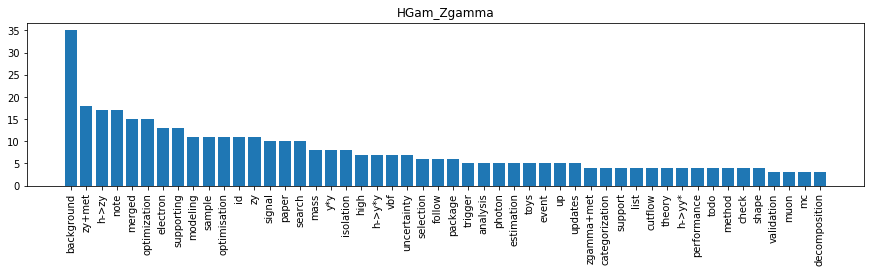

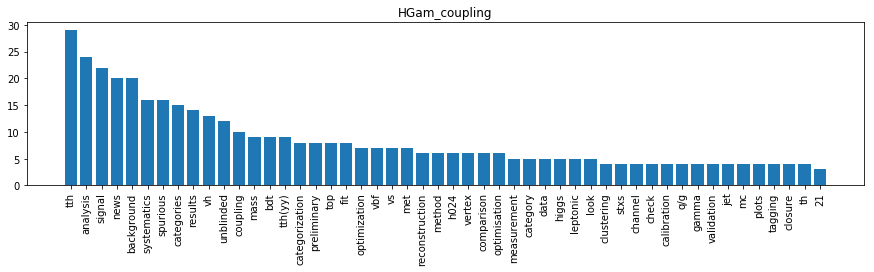

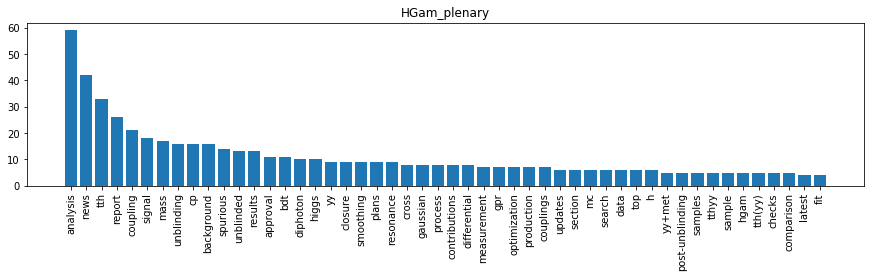

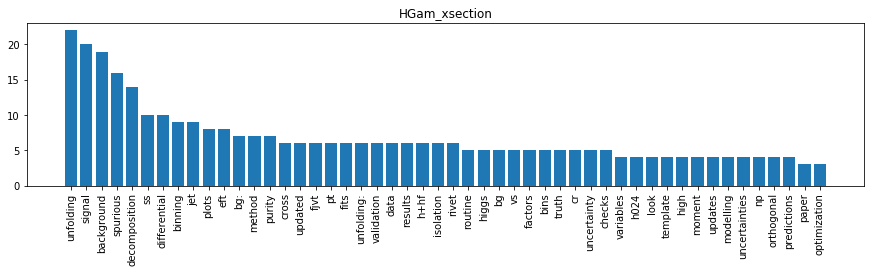

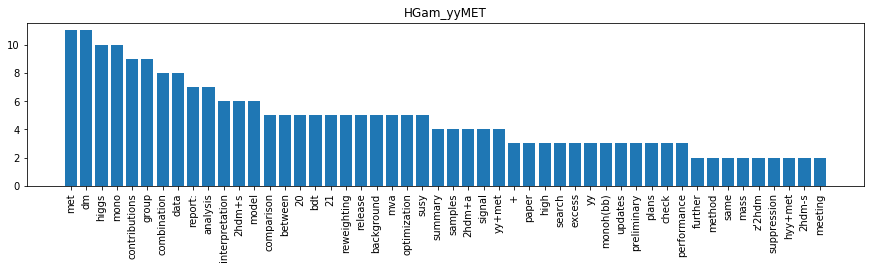

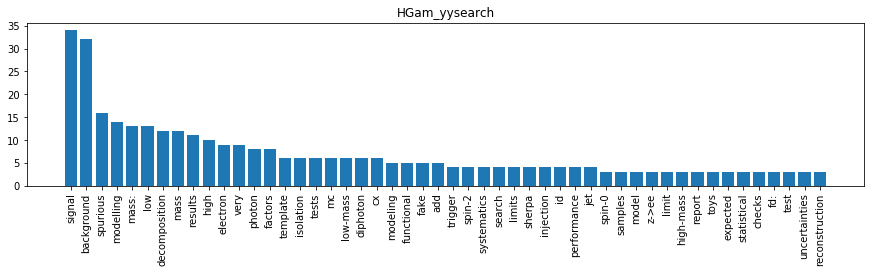

In [283]:
from collections import Counter
common_words = 'using new first discussion study update introduction on -> with for - in ; : & the of and from at a to from by an studies status'.split()

for k, v in df.groupby('my_title')['title_contribution']:
    words = v.apply(lambda x: x.lower()).apply(lambda x: x.split()).sum()
    words = filter(lambda x: x not in common_words, words)
    words = [w.strip(',.;-_') for w in words]
   
    histo_words = Counter(words)
    #print "==", k
    #for kk, vv in histo_words.most_common(100):
    #    print "%s: %d" % (kk, vv)
    values = np.array(list(histo_words.values()))
    labels = np.array(list(histo_words.keys()))
    idx = np.argsort(values)[::-1]
    fig, ax = plt.subplots(figsize=(15, 3))
    ax.bar(np.arange(min(50, len(values))), values[idx][:50])
    ax.set_xticklabels(labels[idx][:100], rotation=90)
    ax.set_xticks(np.arange(50))
    ax.set_title(k)
plt.show()

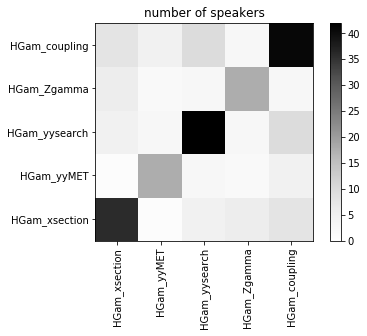

In [284]:
meetings = df_meetings['my_title'].unique().tolist()
meetings.remove('HGam_plenary')

result = np.zeros((len(meetings), len(meetings)))

for i1, m1 in enumerate(meetings):
    for i2, m2 in enumerate(meetings):
        s1 = df[df['my_title'] == m1].speaker.unique()
        s2 = df[df['my_title'] == m2].speaker.unique()
        n12 = len(set(s1).intersection(set(s2)))
        result[i1, i2] = n12
        
fig, ax = plt.subplots()
p = ax.pcolormesh(result, vmin=0, cmap='Greys')
ax.set_xticklabels(meetings, rotation=90)
ax.set_yticklabels(meetings)
ax.set_xticks(np.arange(len(meetings)) + 0.5)
ax.set_yticks(np.arange(len(meetings)) + 0.5)
ax.set_aspect('equal')
ax.set_title('number of speakers')
fig.colorbar(p)
plt.show()